In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
apple_stock = pd.read_csv('apple_stock.csv', index_col='Date')
apple_stock.index = pd.to_datetime(apple_stock.index)
apple_stock.head() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


<AxesSubplot:xlabel='Date'>

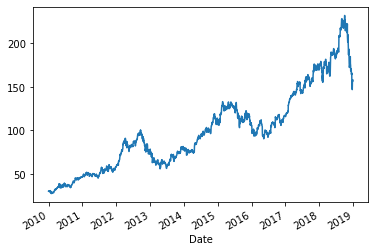

In [4]:
apple_stock["Close"].plot()

In [5]:
a = np.array( apple_stock.Close )  #before_normalization #1차원배열
a = a.reshape(-1,1) # 2차원배열 (행은뭐도상관없고 열은무조건1열만)

# 정규화
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()   

after_Normalization = scaler.fit_transform(a) #after_Normalization (0~1로 바꿔줌), fit_transform 은 2차원에 쓸수있는함수라 a 2차원으로만들어서넣음 
print(a)
print("-"*50)
print(after_Normalization)

# reverseData = scaler.inverse_transform(  after_Normalization )
# print( reverseData )

[[ 30.10428619]
 [ 30.5728569 ]
 [ 30.62571335]
 ...
 [156.1499939 ]
 [156.22999573]
 [157.74000549]]
--------------------------------------------------
[[0.01304069]
 [0.01533048]
 [0.01558878]
 ...
 [0.62899662]
 [0.62938757]
 [0.63676664]]


In [6]:
after_Normalization = after_Normalization.reshape(-1,5,1) #5개씩 가져온다
print(after_Normalization.shape) #총 453개이고, 5개가들어있고(각 행에 값이 5개인?), 열은1개

(453, 5, 1)


In [7]:
X_train = after_Normalization[:, 0:4 ,0]  #4개까지 여기에담고
X_train = X_train.reshape(-1,4,1) #-1은 알아서 하라는 거임.
Y_train = after_Normalization[:, 4, 0] #5번째꺼 여기담아라
Y_train = Y_train.reshape(-1,1)

print(X_train.shape)  
print(Y_train.shape) 

(453, 4, 1)
(453, 1)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU

def make_model() :
    model = Sequential()
    model.add(SimpleRNN(2,activation="relu" ,input_shape=(4, 1))) #SimpleRNN 자리에 LSTM GRU 넣을수있음
    model.add(Dense(1))       
    model.compile(loss='mse', optimizer='sgd')
    model.summary()
    return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 2)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
12/12 [==============================] - 1s 21ms/step - loss: 0.0800 - val_loss: 0.4706
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0569 - val_loss: 0.4119
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.0434 - val_loss: 0.3687
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0350 - val_loss: 0.3366
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.3114
Epoch 6/500
12/12 [=====

12/12 [==============================] - 0s 3ms/step - loss: 9.3129e-04 - val_loss: 0.0963
Epoch 158/500
12/12 [==============================] - 0s 3ms/step - loss: 9.1210e-04 - val_loss: 0.0958
Epoch 159/500
12/12 [==============================] - 0s 4ms/step - loss: 8.9440e-04 - val_loss: 0.0954
Epoch 160/500
12/12 [==============================] - 0s 3ms/step - loss: 8.7518e-04 - val_loss: 0.0952
Epoch 161/500
12/12 [==============================] - 0s 3ms/step - loss: 8.5729e-04 - val_loss: 0.0946
Epoch 162/500
12/12 [==============================] - 0s 4ms/step - loss: 8.4025e-04 - val_loss: 0.0943
Epoch 163/500
12/12 [==============================] - 0s 4ms/step - loss: 8.2403e-04 - val_loss: 0.0940
Epoch 164/500
12/12 [==============================] - 0s 4ms/step - loss: 8.0638e-04 - val_loss: 0.0936
Epoch 165/500
12/12 [==============================] - 0s 4ms/step - loss: 7.9107e-04 - val_loss: 0.0932
Epoch 166/500
12/12 [==============================] - 0s 4ms/step - 

Epoch 313/500
12/12 [==============================] - 0s 3ms/step - loss: 2.0247e-04 - val_loss: 0.0655
Epoch 314/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0154e-04 - val_loss: 0.0654
Epoch 315/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0074e-04 - val_loss: 0.0653
Epoch 316/500
12/12 [==============================] - 0s 3ms/step - loss: 1.9994e-04 - val_loss: 0.0652
Epoch 317/500
12/12 [==============================] - 0s 3ms/step - loss: 1.9891e-04 - val_loss: 0.0651
Epoch 318/500
12/12 [==============================] - 0s 3ms/step - loss: 1.9805e-04 - val_loss: 0.0650
Epoch 319/500
12/12 [==============================] - 0s 3ms/step - loss: 1.9717e-04 - val_loss: 0.0649
Epoch 320/500
12/12 [==============================] - 0s 3ms/step - loss: 1.9632e-04 - val_loss: 0.0648
Epoch 321/500
12/12 [==============================] - 0s 3ms/step - loss: 1.9536e-04 - val_loss: 0.0647
Epoch 322/500
12/12 [==============================] - 

Epoch 468/500
12/12 [==============================] - 0s 4ms/step - loss: 1.4005e-04 - val_loss: 0.0558
Epoch 469/500
12/12 [==============================] - 0s 3ms/step - loss: 1.3977e-04 - val_loss: 0.0558
Epoch 470/500
12/12 [==============================] - 0s 4ms/step - loss: 1.3960e-04 - val_loss: 0.0557
Epoch 471/500
12/12 [==============================] - 0s 4ms/step - loss: 1.3955e-04 - val_loss: 0.0557
Epoch 472/500
12/12 [==============================] - 0s 4ms/step - loss: 1.3915e-04 - val_loss: 0.0557
Epoch 473/500
12/12 [==============================] - 0s 3ms/step - loss: 1.3903e-04 - val_loss: 0.0556
Epoch 474/500
12/12 [==============================] - 0s 3ms/step - loss: 1.3899e-04 - val_loss: 0.0556
Epoch 475/500
12/12 [==============================] - 0s 3ms/step - loss: 1.3877e-04 - val_loss: 0.0556
Epoch 476/500
12/12 [==============================] - 0s 4ms/step - loss: 1.3849e-04 - val_loss: 0.0555
Epoch 477/500
12/12 [==============================] - 

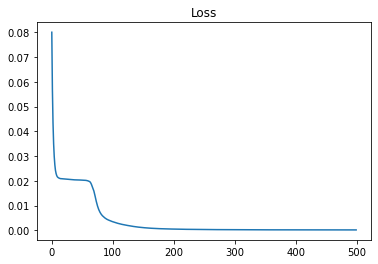

In [27]:
model = make_model() 
history = model.fit(X_train, Y_train, epochs=500 , validation_split =0.2, verbose=1)

# 학습 후 loss
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

In [28]:
y_predict = model.predict( after_Normalization[0, 0:4, 0].reshape(-1,4,1)) #데이터가 몇개인진 상관없어서 -1이지만 4개씩 가져와야하니까 4,1은 고정
print(y_predict,   after_Normalization[0 , 4, 0 ])

reverseData = scaler.inverse_transform(   after_Normalization[0 , 4, 0 ].reshape(-1,1) )
y_predict = scaler.inverse_transform(   y_predict ) #원래대로 데이터를 가져옴(정규화안한결과)
print( y_predict, reverseData )

[[0.01158082]] 0.01293596677571468
[[29.80555]] [[30.08285713]]
